In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Parametros
n_simulations = 1000 
n_steps = 1000      
dt = 0.01            
k = 1.0              
gamma = 2.1          
T = 1.0              
beta = 1 / T        
x0 = 0.0            
x_mean = 0.0        
sigma = np.sqrt(T / k) 

sqrt_2gammaT_dt = np.sqrt(2 * gamma * T * dt)

In [6]:
def simulate_brownian_harmonic(n_steps, dt, k, gamma, T, x0):
    """Simulate a single Brownian motion trajectory under a harmonic potential."""
    x = np.zeros(n_steps)
    x[0] = x0

    for i in range(1, n_steps):
        # Harmonic force term: -k*x
        force = -k * x[i-1]
        
        # Langevin equation: dx = force * dt + noise
        noise = np.random.normal(0, sqrt_2gammaT_dt)
        x[i] = x[i-1] + (force * dt / gamma) + noise

    return x

def approx(x,val,epsilon):
    if x > val - epsilon and x < val + epsilon:
        return True
    else:
        return False

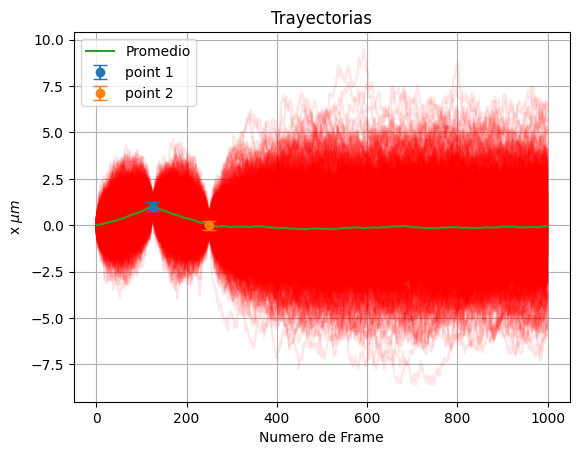

In [7]:
counter = 0
val1 = 1 #At frm1
val2 = 0 #At frm2
frm1 = 125
frm2 = 250
ep = 0.25 #epsilon

accepted_trays = []

while counter < n_simulations:
    sn = simulate_brownian_harmonic(n_steps, dt, k, gamma, T, x0)
    if approx(sn[frm1], val1, ep) and approx(sn[frm2], val2, ep):
        accepted_trays.append(sn)
        plt.plot(sn, color = "r", alpha=0.1)
        counter += 1

plt.errorbar(frm1, val1, yerr=ep, fmt="o", capsize=5, label = "point 1")
plt.errorbar(frm2, val2, yerr=ep, fmt="o", capsize=5, label = "point 2")

mean_tray = [sum(values) / len(values) for values in zip(*accepted_trays)]
plt.plot(mean_tray, label='Promedio')

plt.title("Trayectorias")
plt.xlabel("Numero de Frame")
plt.ylabel(r"x $\mu{}m$")
plt.legend()
plt.grid()
plt.show()


In [8]:
print("Promedio en 1000:", mean_tray[-1])

Promedio en 1000: -0.036266060360913586
